In [112]:
# import statistical tools
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [113]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
%matplotlib inline

In [114]:
# import data
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Boston.csv"
Boston = pd.read_csv(url, index_col = 'SlNo')

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.207e+33
Date:                Sun, 06 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:17:16   Log-Likelihood:                 16044.
No. Observations:                 506   AIC:                        -3.208e+04
Df Residuals:                     504   BIC:                        -3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.082e-16   1.98e-16     -1.049      0.2

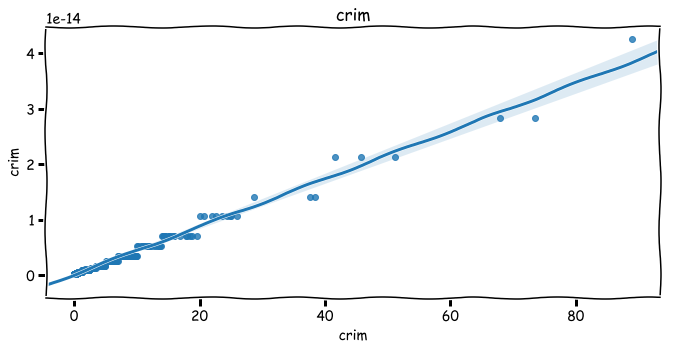

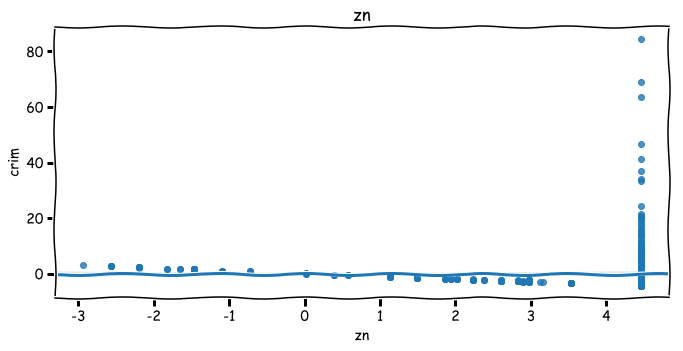

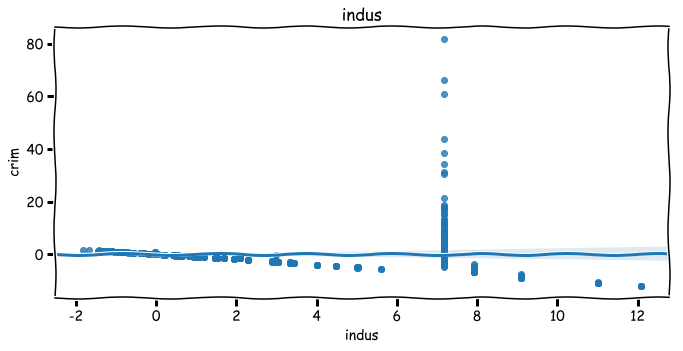

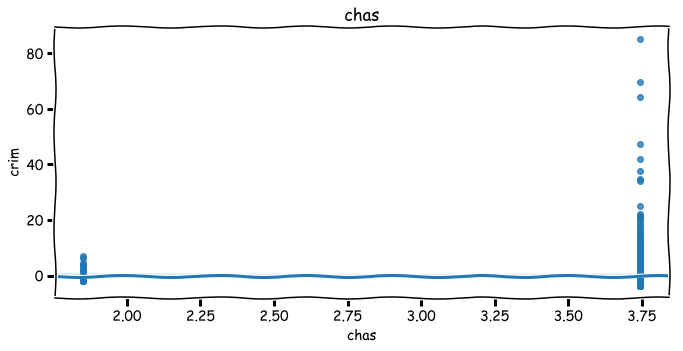

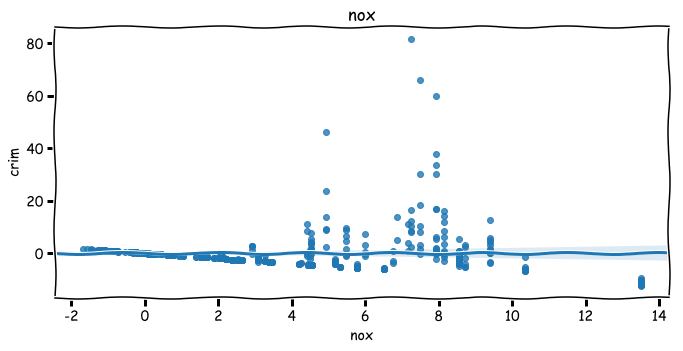

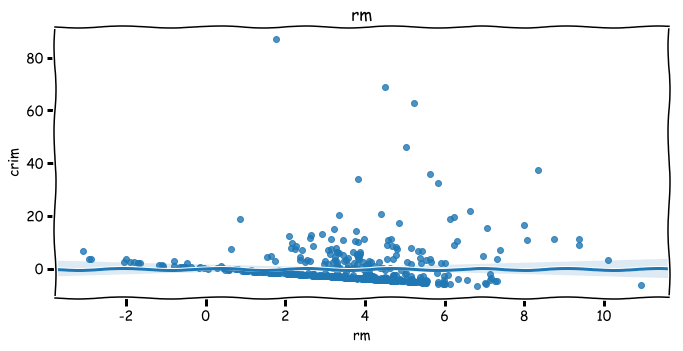

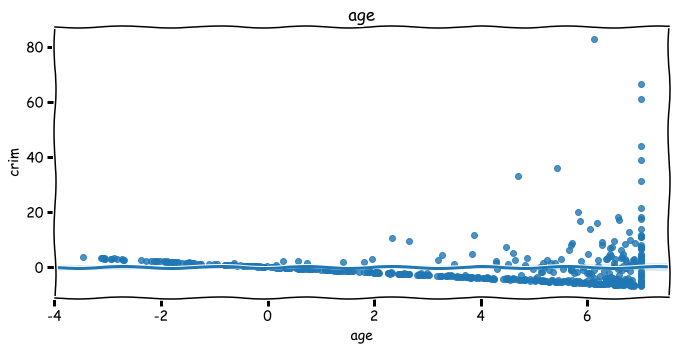

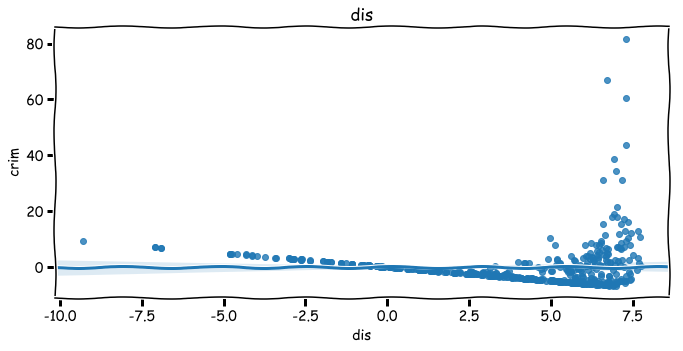

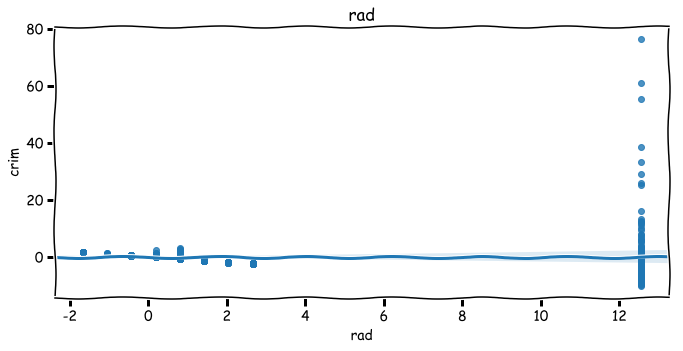

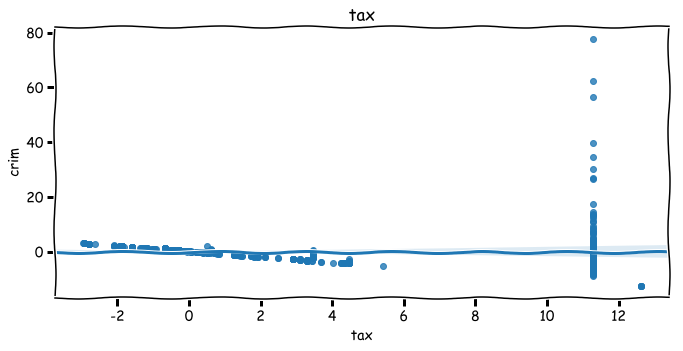

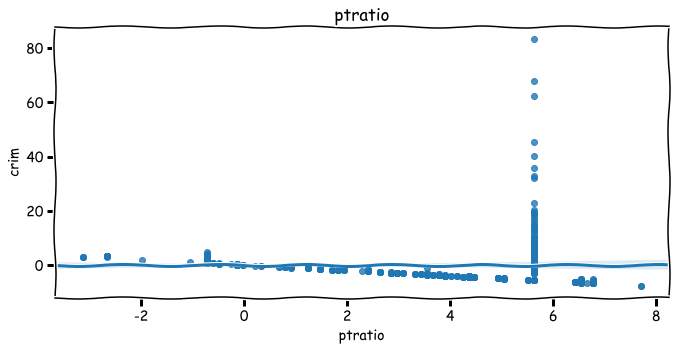

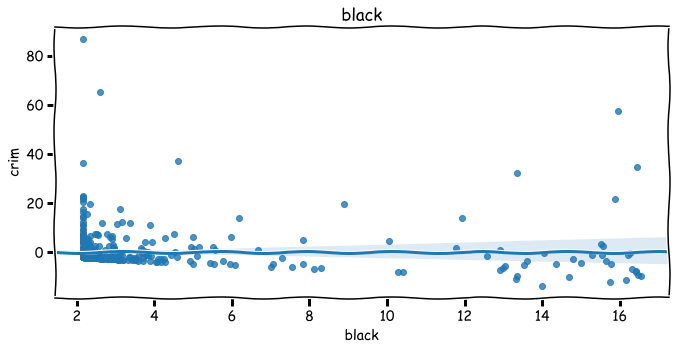

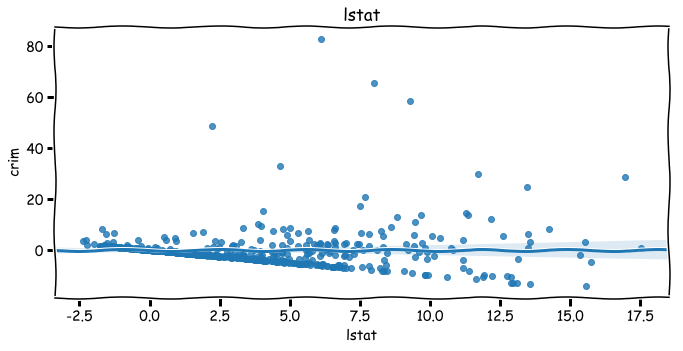

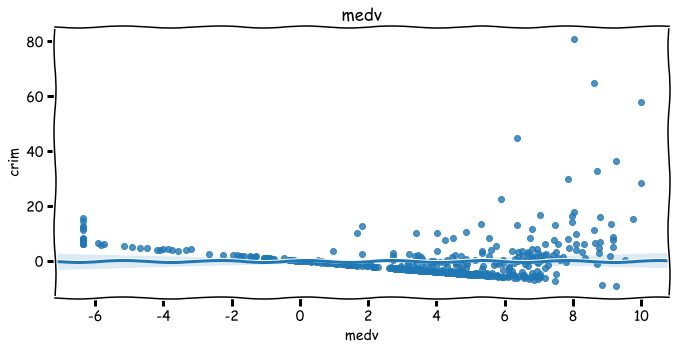

In [115]:
# run simple linear regressions for each independent variable
Boston_columns = list(Boston)
for t in Boston_columns:
    reg = ols("crim~Boston[t]", data = Boston).fit()
    print(reg.summary())
    print()
    plt.xkcd()
    plt.figure(figsize = (11, 5))
    sns.regplot(reg.predict(), reg.resid, data = Boston)
    plt.title(t)
    plt.xlabel(t)
    plt.ylabel('crim')
    print()
    print(colored("="*78, 'green'))
print()

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           1.57e-56
Time:                        18:17:32   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------

Text(0.5,1,'Boston Pairplot')

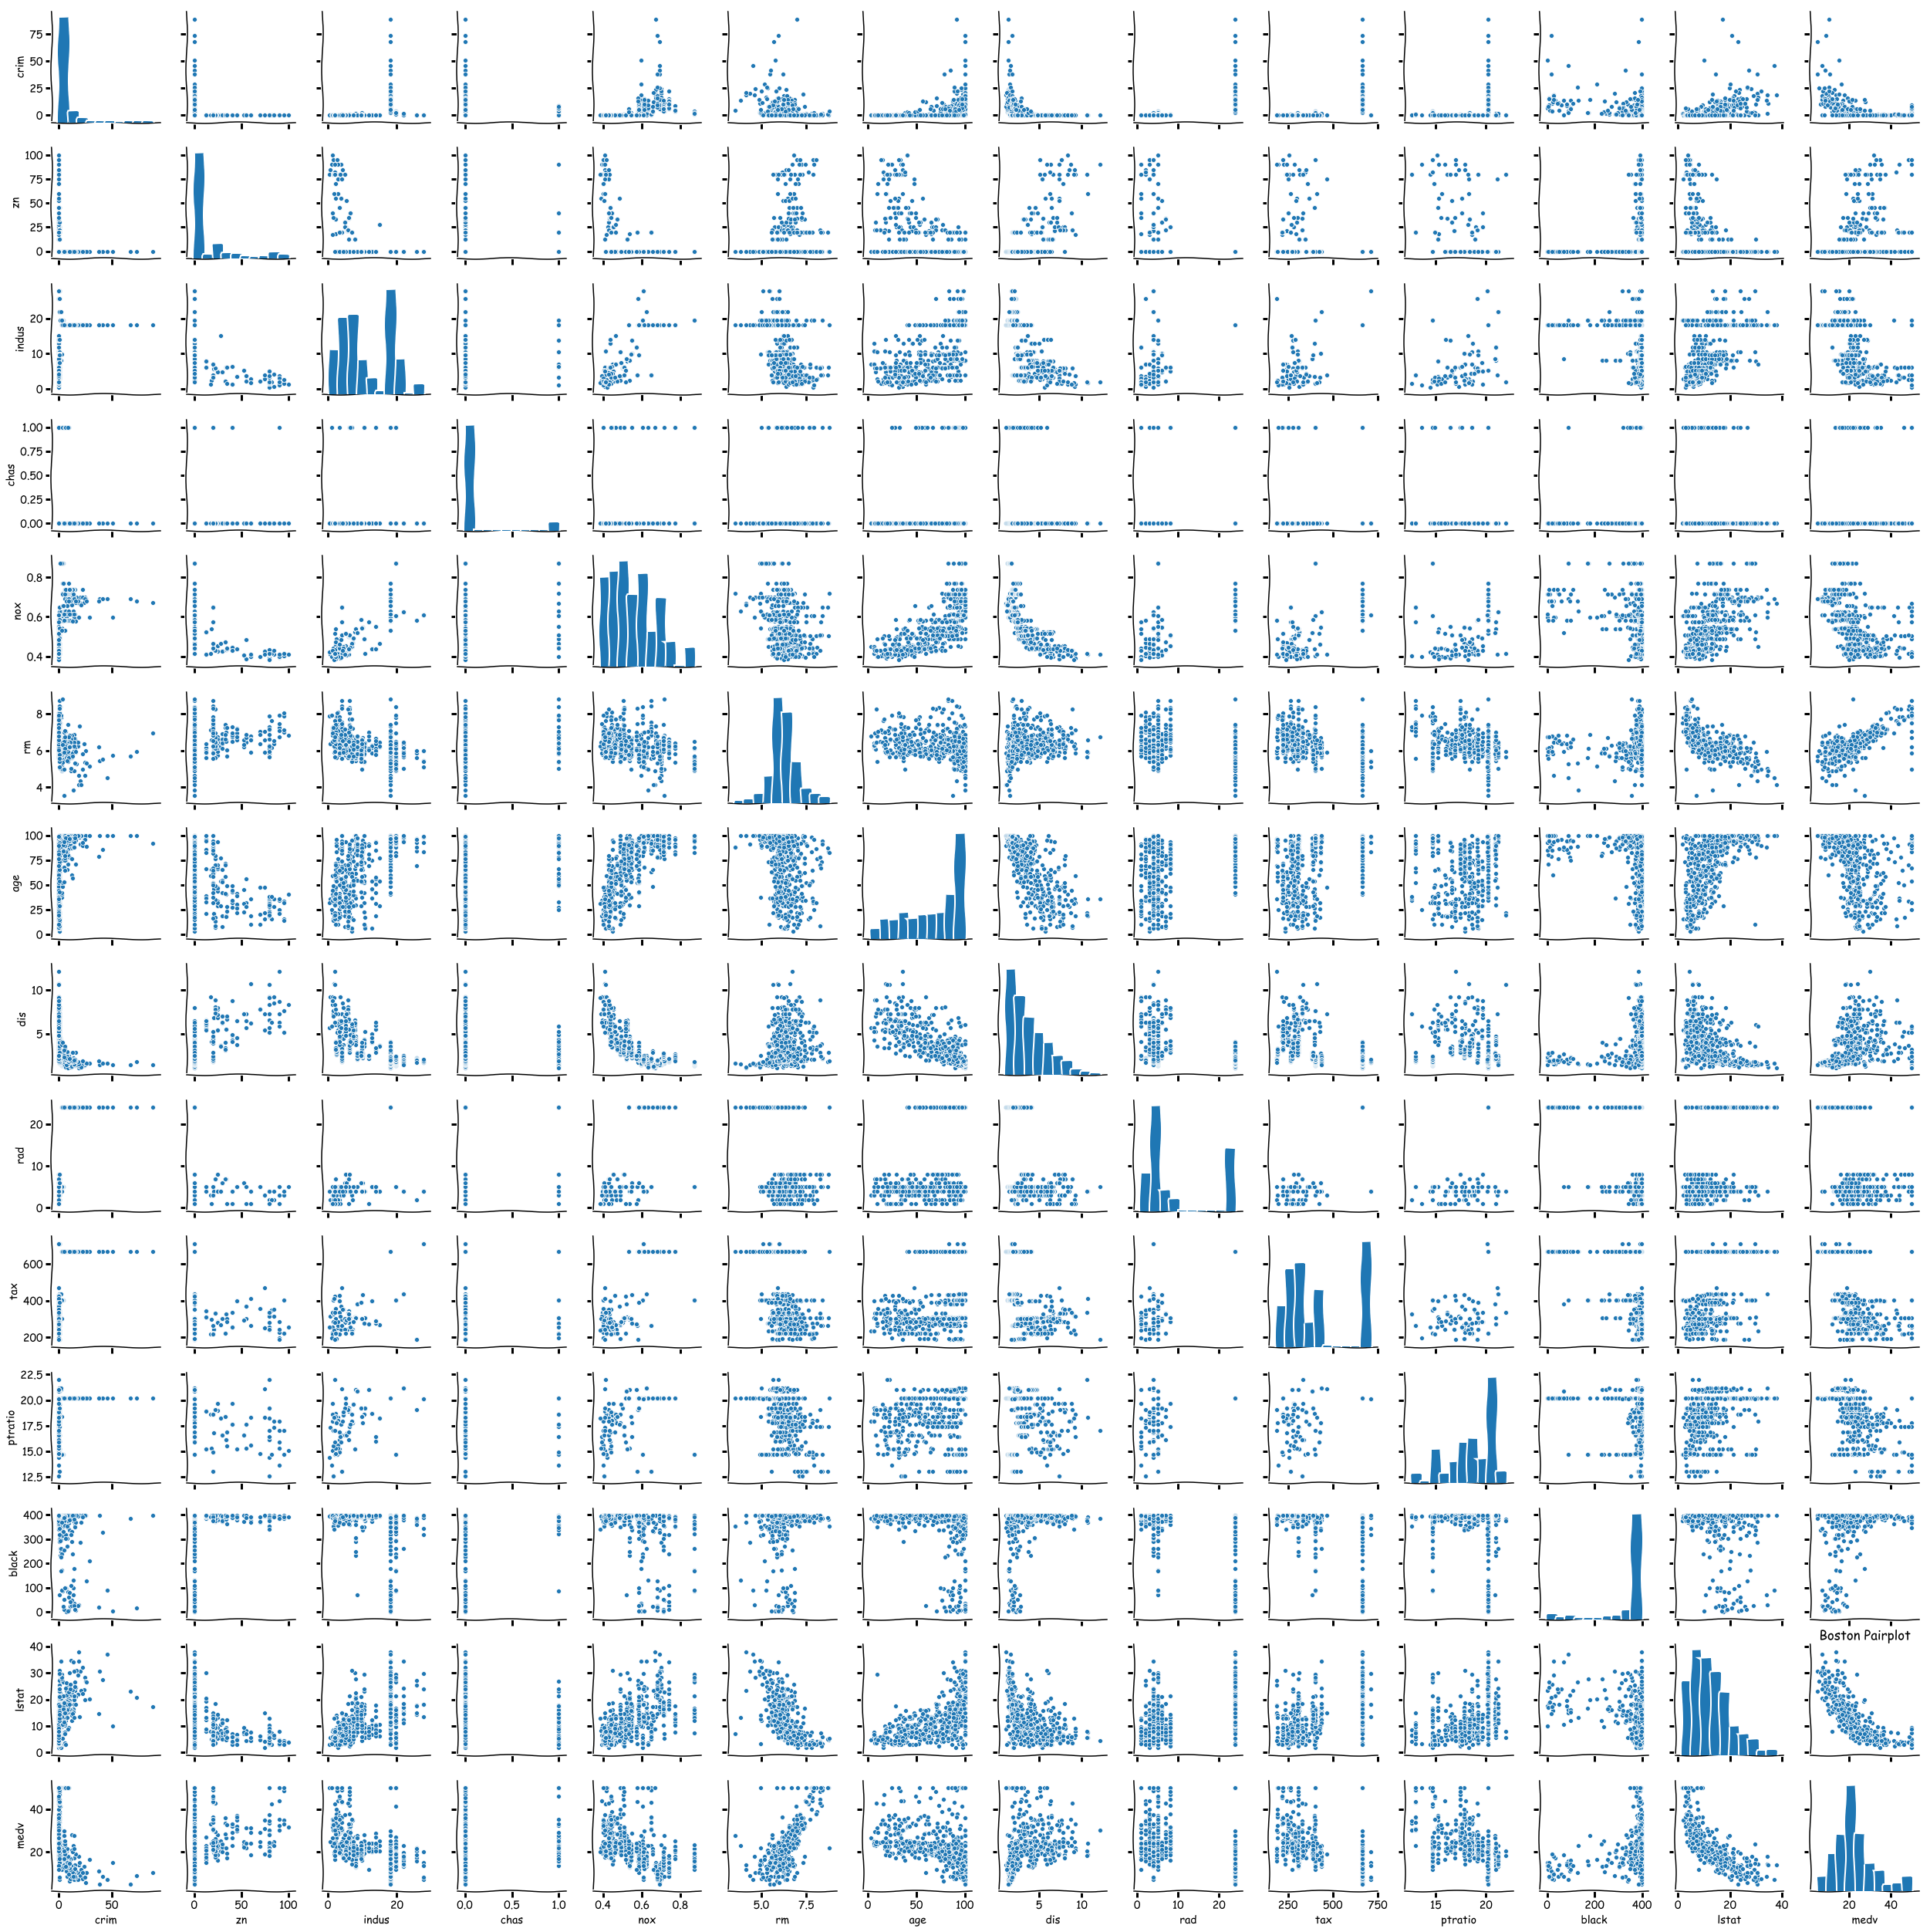

In [116]:
# run multivariate linear regression for 'crim'
print(list(Boston))
X1 = Boston.iloc[:,[1,2,4,5,6,7,8, 9,10,11,12,13]]
X2 = Boston['chas']
reg = ols("crim~zn+indus+C(chas)+nox+rm+age+dis+rad\
          +tax+ptratio+black+lstat+medv", data = Boston).fit()
print(reg.summary())
print()
print(colored("="*78, 'green'))
print()
plt.xkcd()
sns.pairplot(Boston)
plt.title("Boston Pairplot")

In [118]:
# run polynomial regressions for each independent variable
Boston_columns = list(Boston)
for t in Boston_columns:
    reg = ols("crim~Boston[t]+I(pow(Boston[t],2)) +\
              I(pow(Boston[t],3))", data = Boston).fit()
    print(reg.summary())
    print()
    print(colored("="*78, 'green'))
print()

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.285e+27
Date:                Sun, 06 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:18:01   Log-Likelihood:                 12995.
No. Observations:                 506   AIC:                        -2.598e+04
Df Residuals:                     502   BIC:                        -2.597e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.636e-12 

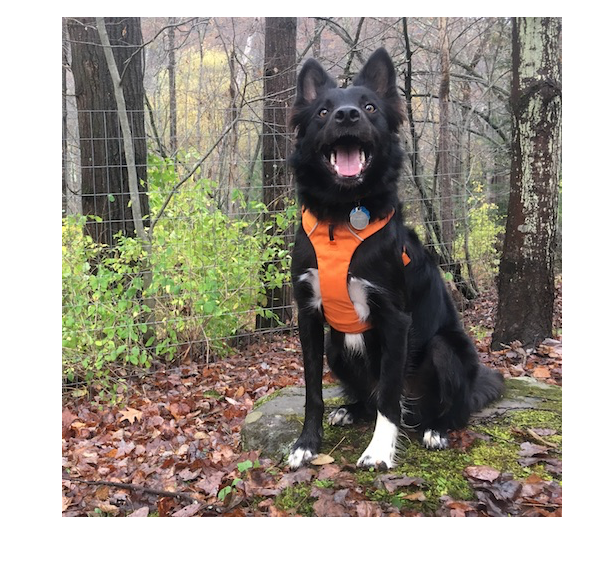

In [119]:
sns.dogplot() # displays a dog's photo. What's life without some fun?!